#  Investigate Data Online sales data using `Rstudio` : and plotting with `ggplot2` 

**With Mr. Fugu Data Sciecne**


# (◕‿◕✿)

[youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw/) | [github](github.com/MrFuguDataScience)


# Outcome & Purpose:
+ Form Order Totals Based on InvoiceNo
    + Evaluate Sales Based On InvoiceNo
        + Plot Sales Based on Dollar Amount *(Ranges)*
+ Investigate Sales By Country
    + Plot Sales By Country 


# <font color='red'>Subscribe</font> & TURN ON Notification Bell

# Throw a <font color='red'>Like</font>

In [26]:
library(knitr)
library(ggplot2)
# library(data.table)
# library(cluster)
# library(cluster.datasets)
# library(factoextra)
# library(dbplyr)
# library(dplyr)
# library(tidyr)
library(tidyverse)

In [2]:
onlineretail<-read.csv("online_sales.csv")

In [6]:
online_retail_am <- onlineretail %>% distinct()

remove_na<-na.omit(online_retail_am)

sort_countries<-remove_na[order(remove_na$Country,remove_na$Description),]

canceled_orders<-sort_countries[grep("C",sort_countries$InvoiceNo),]


In [7]:
canceled_orders$Quantity<-abs(canceled_orders$Quantity)
sort_countries$Quantity<-abs(sort_countries$Quantity)

In [8]:
fun<-sort_countries %>% 
  left_join(select(canceled_orders, CustomerID, StockCode, Quantity, Matches=Country)) %>% 
  mutate(Matches=ifelse(is.na(Matches), FALSE, TRUE))

Joining, by = c("StockCode", "Quantity", "CustomerID")



In [9]:
mm<-fun[!duplicated(fun),]

In [12]:
Rest_ofData<-mm[mm$Matches=='FALSE',]
head(Rest_ofData)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Matches
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<int>,<fct>,<lgl>
1,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,FALSE
2,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,FALSE
3,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,FALSE
4,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,FALSE
5,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,FALSE
6,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,FALSE


In [13]:
Rest_ofData_new<-transform(Rest_ofData, Total = UnitPrice * Quantity)
head(Rest_ofData_new)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Matches,Total
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<int>,<fct>,<lgl>,<dbl>
1,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,FALSE,216.0
2,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,FALSE,16.6
3,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,FALSE,40.8
4,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,FALSE,211.2
5,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,FALSE,10.2
6,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,FALSE,69.6


In [14]:
# Understand that while each ORDER may have only 1 item or more; the quantity can be >1.

one_item_order<-nrow(Rest_ofData[!duplicated(Rest_ofData$InvoiceNo),])/nrow(Rest_ofData)*100
many_items<-nrow(Rest_ofData[duplicated(Rest_ofData$InvoiceNo),])/nrow(Rest_ofData)*100

sprintf('One Item Per Order, But Many have Quantity >1 of Item: ',fmt = "%-8s%-6.2f%%", one_item_order)

sprintf('Many Items Per Order, But Many have Quantity >1 of Items: ',fmt = "%-8s%-6.2f%%", many_items)

[1] "One Item Per Order, But Many have Quantity >1 of Item: 4.71  %"

[1] "Many Items Per Order, But Many have Quantity >1 of Items: 95.29 %"

In [28]:
mb<-data.frame(Invoice=Rest_ofData_new$InvoiceNo,Total=Rest_ofData_new$Total)
head(mb[order(mb$Invoice),])

# head(Rest_ofData_new)

,Invoice,Total
,<fct>,<dbl>
108681,536365,22.00
151076,536365,25.50
196800,536365,20.34
282045,536365,20.34
303814,536365,15.30
368200,536365,15.30


# `Forming a Dataframe with Invoices and Their Order Totals with CustomerID`

In [31]:
# library(data.table)
DT <- data.table(mb)


Order_Totals<-DT[, lapply(.SD, sum), by = Invoice]

subset<-data.frame(CustomerID=Rest_ofData_new$CustomerID,
                   Invoice=Rest_ofData_new$InvoiceNo)



In [18]:
Invoice_Totals<-merge(subset, Order_Totals, by.x="Invoice", by.y="Invoice", sort = TRUE)
head(Invoice_Totals[!duplicated(Invoice_Totals),])

,Invoice,CustomerID,Total
,<fct>,<int>,<dbl>
1,536365,17850,139.12
8,536366,17850,11.10
9,536367,13047,278.73
21,536368,13047,70.05
25,536369,13047,17.85
26,536370,12583,855.86


`_______________________________________`

# Sales By Order Total:

+ Order Amounts will be grouped by Order Amount ranges (0-50,50-100,100-200 etc)
+ Then The Frequency will be added for each range and divided by the Total 
+ to get a proportion. Then a new data frame with ranges for names will be a new column:

In [19]:
qty<-c('<50','50-100','100-200','200-500','500-1000','1000-5000','5000+')

props<-c(nrow(Invoice_Totals[(Invoice_Totals$Total<50),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>50&Invoice_Totals$Total<100),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>100&Invoice_Totals$Total<200),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>200&Invoice_Totals$Total<500),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>500&Invoice_Totals$Total<1000),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>1000&Invoice_Totals$Total<5000),])/nrow(Invoice_Totals),

nrow(Invoice_Totals[(Invoice_Totals$Total>=5000),])/nrow(Invoice_Totals))

order_ranges<-data.frame(qty,props)
order_ranges

qty,props
<fct>,<dbl>
<50,0.006670024
50-100,0.016720249
100-200,0.152478341
200-500,0.451908949
500-1000,0.230770423
1000-5000,0.124664627
5000+,0.016743489


In [33]:
# Sales By Each Country:

Country_tot<-data.frame(Country=Rest_ofData_new$Country,Total=Rest_ofData_new$Total)

DTT <- data.table(Country_tot)

Country_Total_sales<-DTT[, lapply(.SD, sum), by = Country]
head(Country_Total_sales)



Country,Total
<fct>,<dbl>
Australia,136919.90
Austria,10198.68
Bahrain,548.40
Belgium,40938.69
Brazil,1143.60
Canada,3666.38


In [34]:
# Proportion of Total Sales By Counry:

x<-sum(x=Country_Total_sales$Total)
xx<-round(x, digits = 2)

sales_percent_country<-data.frame(Country=Country_Total_sales$Country,
                        Proportion=round(x=Country_Total_sales$Total/xx,digits=3))

# Ordered By Descending Amount
head(sales_percent_country[(order(-sales_percent_country$Proportion)),])

bb<-sales_percent_country[sales_percent_country$Proportion>.01,]



,Country,Proportion
,<fct>,<dbl>
35,United Kingdom,0.815
24,Netherlands,0.034
11,EIRE,0.029
15,Germany,0.027
14,France,0.025
1,Australia,0.017


[1] 8296450

# Sales By Country:
+ Where any country with <1% will all be summed and put into its own row as (Others)

In [23]:
# Adjusting for values <.01, then taking a sum and counting as a whole (ALL Others)
# which means that all other countries combine equal 5%

asd<-sales_percent_country[sales_percent_country$Proportion<.01,]
Proportion<-sum(asd$Proportion)

Other<-data.frame(Country='All Others',Proportion=Proportion)
bbv<-rbind(bb,Other)
bbv

,Country,Proportion
,<fct>,<dbl>
1,Australia,0.017
11,EIRE,0.029
14,France,0.025
15,Germany,0.027
24,Netherlands,0.034
35,United Kingdom,0.815
12,All Others,0.051


# Order Totals By Price Range: Plot

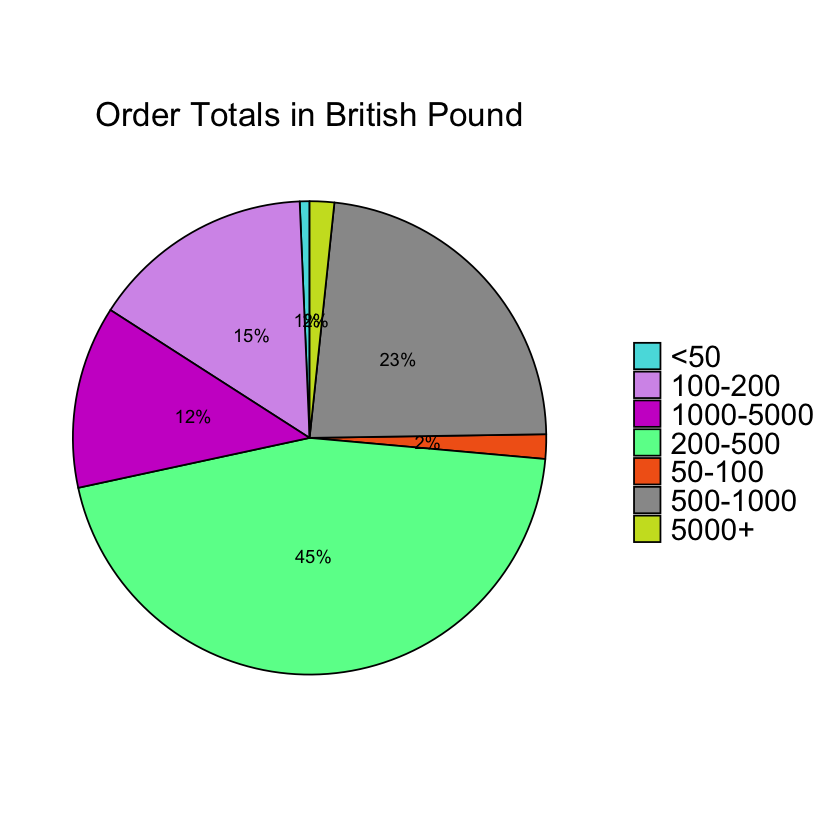

In [35]:
# library(ggplot2)


# Create a basic bar
pie = ggplot(order_ranges, 
             aes(x="", y=props, fill=qty)) + geom_bar(stat="identity",
                                            # add black border around plot
                                            width=1,color='black')
                                                             


# Convert to pie (polar coordinates) and add labels
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(props*100), "%")), 
# Shifting the Percent values left or right within each wedge:    
position = position_stack(vjust = 0.51))

# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("#55DDE0", "#d59aea", "#cc00cc",
                                       "#66ff99", "#F26419", "#999999",'#cbde26')) 

# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL,
                 title = "Order Totals in British Pound")
 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
          axis.text = element_blank(),
          legend.text=element_text(size = 18),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = .5, color = "#000000",size=20))

# options(repr.plot.width=800, repr.plot.height=500)      
pie

  

# Sales By Country Pie Plot:

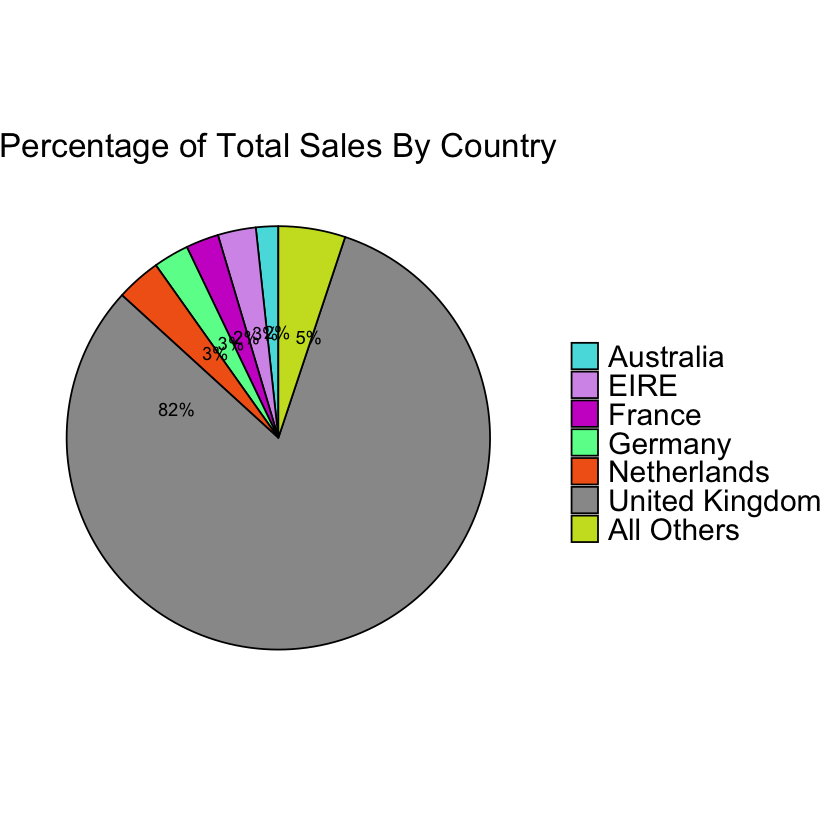

In [25]:
pie = ggplot(bbv, 
             aes(x="", y=Proportion, fill=Country)) + geom_bar(stat="identity",
                                            # add black border around plot
                                            width=1,color='black')
                                                             


# Convert to pie (polar coordinates) and add labels
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(Proportion*100), "%")), 
# Shifting the Percent values left or right within each wedge:    
position = position_stack(vjust = 0.91))

# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("#55DDE0", "#d59aea", "#cc00cc",
                                       "#66ff99", "#F26419", "#999999",'#cbde26')) 

# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL,
                 title = "Percentage of Total Sales By Country")
 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
          axis.text = element_blank(),
          legend.text=element_text(size = 18),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = .5, color = "#000000",size=20))

# options(repr.plot.width=800, repr.plot.height=500)      
pie

# Citations & Help:

https://stackoverflow.com/questions/15047742/sum-of-rows-based-on-column-value

https://stackoverflow.com/questions/53508851/how-to-create-a-table-from-a-data-frame-where-a-cell-could-have-multiple-values

# Plot Help
https://stackoverflow.com/questions/47997941/creating-piechart-from-a-count-column-with-percentage-as-labels

https://stackoverflow.com/questions/45657990/how-to-create-a-pie-chart-with-percentage-labels-using-ggplot2

https://stackoverflow.com/questions/59740175/r-plot-ly-pieplot-legend-with-different-column